In [1]:
from mediapipe import solutions 
from mediapipe.framework.formats import landmark_pb2 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [2]:
MARGIN=10 
FONT_SIZE=1 
FONT_THICKNESS=1 
HANDEDNESS_TEXT_COLOR=(88,205,54) 

In [3]:
base_options = python.BaseOptions(model_asset_path="hand_landmarker.task")
options=vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
detector=vision.HandLandmarker.create_from_options(options)

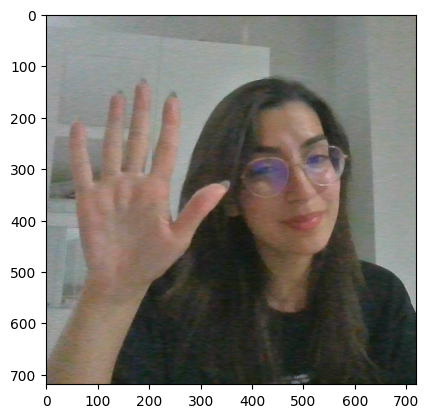

In [4]:
img=cv2.imread("data/el_tespiti_1.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

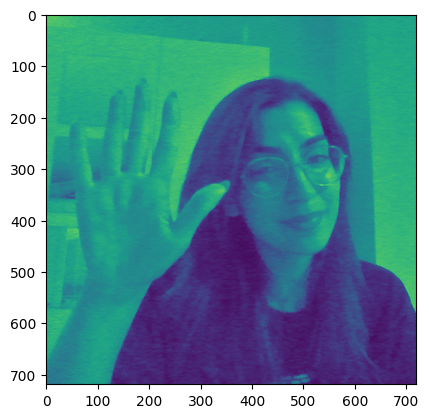

In [5]:
img=cv2.imread("data/el_tespiti_1.jpg",0)
plt.figure()
plt.imshow(img)

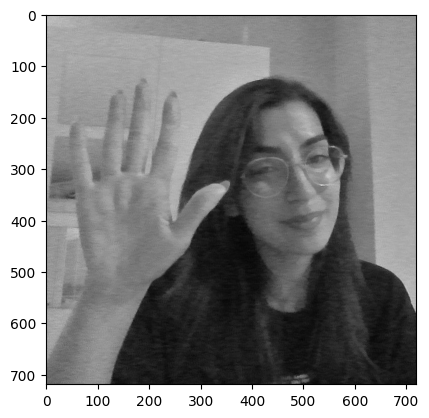

In [6]:
plt.figure()
plt.imshow(img, cmap="gray")

In [7]:
img.shape

(719, 719)

In [8]:
bfr=cv2.resize(img,(640,960))
print(bfr.shape)

(960, 640)


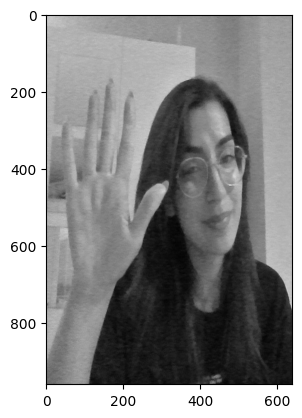

In [9]:
plt.figure()
plt.imshow(bfr, cmap="gray")

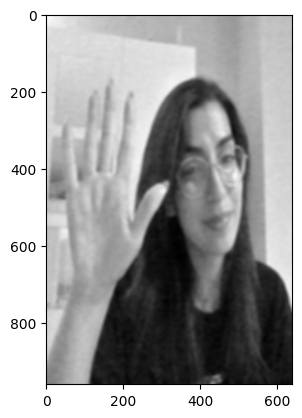

In [10]:
bfr=cv2.blur(bfr,(10,10))
plt.imshow(bfr,cmap="gray")

In [11]:
cv2.imwrite("data/el_tespit_nida.jpg",bfr)

True

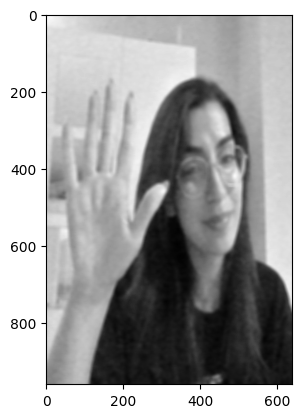

In [12]:
img=cv2.imread("data/el_tespit_nida.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")

In [13]:
cv2.imwrite("data/el_tespit_odev.jpg",img)

True

In [14]:
image=mp.Image.create_from_file("data/el_tespiti_1.jpg")

detection_result= detector.detect(image)

In [15]:
def draw_landmarks_on_image(rgb_image, detection_result):
    hand_landmarks_list=detection_result. hand_landmarks 
    handedness_list=detection_result.handedness 
    annotated_image= np.copy(rgb_image) 

    for idx in range(len(hand_landmarks_list)):
        hand_landmarks=hand_landmarks_list[idx] 
        handedness=handedness_list[idx] 

        hand_landmarks_proto=landmark_pb2.NormalizedLandmarkList() 
        hand_landmarks_proto.landmark.extend([landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks])
        solutions.drawing_utils.draw_landmarks( 
            annotated_image,
            hand_landmarks_proto,
            solutions.hands.HAND_CONNECTIONS,
            solutions.drawing_styles.get_default_hand_landmarks_style(),
            solutions.drawing_styles.get_default_hand_connections_style()) 
        
        height, width, _=annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks]
        y_coordinates = [landmark.y for landmark in hand_landmarks]
        text_x=int(min(x_coordinates*width))
        text_y=int(min(y_coordinates*height))-MARGIN

        cv2.putText(annotated_image,f"{handedness[0].category_name}", (text_x,text_y), cv2.FONT_HERSHEY_DUPLEX, FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS,cv2.LINE_AA)

    return annotated_image

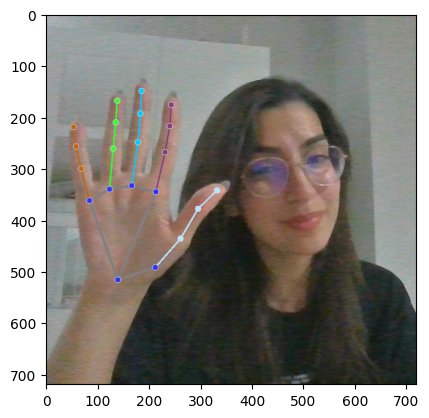

In [16]:
annotated_image=draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.figure()
plt.imshow(annotated_image)

In [17]:
cv2.imwrite("data/el_tespit_odev2.jpg",annotated_image)

True